In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X = mnist['data']
y = mnist['target']

Text(0.5,1,'9.0')

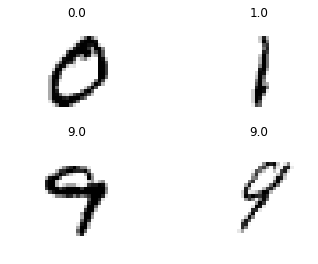

In [5]:
import matplotlib
import matplotlib.pyplot as plt
f, axarr = plt.subplots(2, 2)

index1 = 0
index2 = 11210
index3 = 54321
index4 = 69000

some_digit1 = X[index1].reshape(28, 28)
some_digit2 = X[index2].reshape(28, 28)
some_digit3 = X[index3].reshape(28, 28)
some_digit4 = X[index4].reshape(28, 28)

axarr[0, 0].imshow(some_digit1 , cmap = matplotlib.cm.binary)
axarr[0, 0].axis('off');
axarr[0, 0].set_title(y[index1])

axarr[0, 1].imshow(some_digit2 , cmap = matplotlib.cm.binary)
axarr[0, 1].axis('off');
axarr[0, 1].set_title(y[index2])

axarr[1, 0].imshow(some_digit3 , cmap = matplotlib.cm.binary)
axarr[1, 0].axis('off');
axarr[1, 0].set_title(y[index3])

axarr[1, 1].imshow(some_digit4 , cmap = matplotlib.cm.binary)
axarr[1, 1].axis('off');
axarr[1, 1].set_title(y[index4])

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [7]:
import numpy as np
shuffle_index =  np.random.permutation(60000)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

In [8]:
from sklearn.linear_model import SGDClassifier
classifier  = SGDClassifier(random_state=42)
classifier.fit(X_train,y_train)

C:\Users\menti\OneDrive - Sheffield Hallam University\WPy-3662\python-3.6.6.amd64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

the value is [9.]


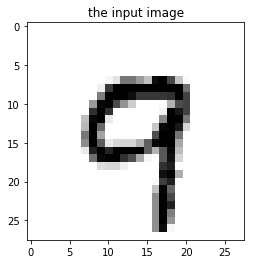

In [10]:
some_index = 56783

plt.title('the input image')
plt.imshow(X[some_index].reshape(28,28),cmap = matplotlib.cm.binary)
#plt.axis('off')

print('the value is', classifier.predict([X[some_index]]))


C:\Users\menti\OneDrive - Sheffield Hallam University\WPy-3662\python-3.6.6.amd64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\menti\OneDrive - Sheffield Hallam University\WPy-3662\python-3.6.6.amd64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default

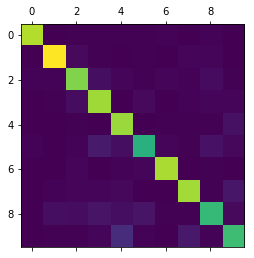

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(classifier, X_train, y_train, cv=4)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx)

In [12]:
import cv2
import numpy as np

cap = cv2.VideoCapture(2)
se2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

#Adjust the input to make it similar to the mnist samples 
def adjust(image):
    # build a lookup table
    T=100;#Threshold
    table = np.arange(0,256)
    for i in table:
        if (i>T):
            table[i]=0
        else:
            table[i]=-255*i*i/(T*T)+255                         
    table = table.astype("uint8") 
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

while(cv2.waitKey(1) & 0xFF != ord('q')):
    rec, frame = cap.read()
    frame = cv2.resize(frame,(800,600))
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img = cv2.medianBlur(gray_frame,5)
    th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,2)
    #ret,th =  cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #mask = cv2.morphologyEx(th, cv2.MORPH_CLOSE, se1)
    mask = cv2.morphologyEx(th, cv2.MORPH_OPEN, se2)
    image, contours, hier = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
        
   # with each contour, draw boundingRect in grey. To speed up. Only draw object if we have less than 100 objects. 
    if (len(contours)<=100):
        for c in contours:
            # get the bounding rect
            x, y, w, h = cv2.boundingRect(c)
            #Only draw object larger than 500 pixels
            if (w*h>=500):
                center_x = int(x+w/2)
                center_y = int(y+h/2)
                edge = int((w if h < w else h)*1.5) #using longer 
                new_x = int(center_x - edge/2)
                new_y = int(center_y - edge/2)
                # draw a green rectangle to visualize the bounding rect
                cv2.rectangle(frame, (new_x, new_y), (new_x+edge, new_y+edge), (100, 100, 100), 1)
                crop_img = gray_frame[new_y:new_y+edge,new_x:new_x+edge] 
                #Above operation can make one of dimension become 0
                if (crop_img.shape[0]!=0 and crop_img.shape[1]!=0):
                    sample = adjust(crop_img);
                    #cv2.imshow("crop_img",sample)
                    pred_sample =cv2.resize(sample,(28,28))
                    predction = classifier.predict(pred_sample.reshape(1,28*28))                    
                    cv2.putText(frame, np.array2string(predction),(new_x,new_y),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,0),2)
                    
    cv2.imshow("bw", mask)
    cv2.imshow("contours", frame)  
        
cap.release()
cv2.destroyAllWindows()
    